# Figure 3: Nodding position versus S/N

In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic
from astropy.io import fits

Load data corresponding with the S/N and phase coverage.

In [20]:
wls_cube_n1 = np.load('../data/snr/wls_cube_night_1.npy')
wls_cube_n2 = np.load('../data/snr/wls_cube_night_2.npy')

snr_cube_n1 = np.load('../data/snr/snr_cube_night_1.npy')
snr_cube_n2 = np.load('../data/snr/snr_cube_night_2.npy')

ph_arr_n1 = np.load('../data/phase_coverage/ph_arr_night_1.npy')
ph_arr_n2 = np.load('../data/phase_coverage/ph_arr_night_2.npy')

am_arr_n1 = np.load('../data/phase_coverage/am_arr_night_1.npy')
am_arr_n2 = np.load('../data/phase_coverage/am_arr_night_2.npy')

Load humidity data and nodding position of each frame.

In [21]:
frame = 1
hum = []
nodpos = []
temp = []
for frame in range(200):
    try:
        hdul = fits.open(f'/Users/lsluijs/Projects/WINERED/pre_processing/WASP-189/2023A/2023_06_09/WARP_out/WASP-189_NO{frame}/onedspec/VAC_norm/fsr1.30/WASP-189_NO{frame}_m138_fsr1.30_VAC_norm.fits')
        hum.append(hdul[0].header['OUT-HUM'])
        nodpos.append(hdul[0].header['NODPOS'])
    except:
        pass

nodpos_n1 = []
nodpos_n2 = []

for frame in range(400):
    try:
        hdul = fits.open(f'/Users/lsluijs/Projects/WINERED/pre_processing/WASP-189/2023A/2023_06_09/WARP_out/WASP-189_NO{frame}/onedspec/VAC_norm/fsr1.30/WASP-189_NO{frame}_m138_fsr1.30_VAC_norm.fits')
        value = hdul[0].header['NODPOS']
        if 'A' in value:
            nodpos_n1.append('A')
        if 'B' in value:
            nodpos_n1.append('B')
    except:
        pass

for frame in range(400):
    try:
        hdul = fits.open(f'/Users/lsluijs/Projects/WINERED/pre_processing/WASP-189/2024A/2024_04_19/WARP_out/WASP-189_NO{frame}/onedspec/VAC_norm/fsr1.30/WASP-189_NO{frame}_m138_fsr1.30_VAC_norm.fits')
        nodpos_n2.append(hdul[0].header['NODPOS'])
    except:
        pass


nodpos_n1 = np.array(nodpos_n1)
nodpos_n2 = np.array(nodpos_n2)

nodpos_mask_n1 = []
for np1, np2 in zip(nodpos_n1[:-1], nodpos_n1[1:]):
    if np1 == np2:
        nodpos_mask_n1.append(True)
    else:
        nodpos_mask_n1.append(False)

nodpos_mask_n2 = []
for np1, np2 in zip(nodpos_n2[:-1], nodpos_n2[1:]):
    if np1 == np2:
        nodpos_mask_n2.append(True)
    else:
        nodpos_mask_n2.append(False)

nodpos_mask_n1 = np.array(nodpos_mask_n1)
nodpos_mask_n2 = np.array(nodpos_mask_n2)

Some plotting parameters.

In [22]:
APJ_SINGLE_COL = 3.5
APJ_DOUBLE_COL = 7.
TEXTSIZE=12
TICKSIZE=10

WR_RED = '#80273F'
WR_GREEN = '#008000'

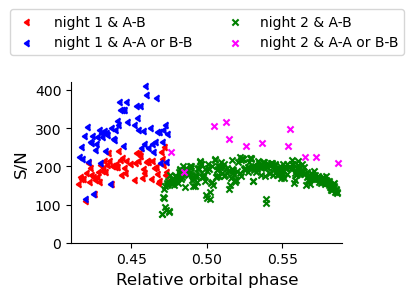

In [23]:
fig, ax_snr = plt.subplots(figsize=(APJ_SINGLE_COL, APJ_SINGLE_COL/1.68))

lines = []

for i, (snr_cube, plot_label, marker, ph_arr, nodpos_mask) in enumerate(zip(
    (snr_cube_n1, snr_cube_n2),
    ('night 1', 'night 2'),
    (8, 9),
    (ph_arr_n1, ph_arr_n2),
    (nodpos_mask_n1, nodpos_mask_n2)
    )):
    for mask, np_color, mask_label in zip((~nodpos_mask, nodpos_mask), ('red', 'blue'), ('A-B', 'A-A or B-B')):
        frames = np.arange(0.5, snr_cube.shape[0], 1)
        
        if plot_label == 'night 2':
            marker = 'x'
            if np_color == 'red':
                np_color = 'green'
            else:
                np_color = 'magenta'

        ph_arr_t = ph_arr[:-1] + np.diff(ph_arr)/2.
        snr_time = np.median(snr_cube, axis=(1,2))
        ax_snr.scatter(ph_arr_t[mask], snr_time[mask], color=np_color, s=20, label=plot_label + ' & ' + mask_label, marker=marker)

ax_snr.set_ylim(0,400)
    
eclipse_window = (0.46685671346545227, 0.5331432865345478)
ax_snr.set_ylim(0, 420)

ax_snr.set_xlim(0.41,0.59)
ax_snr.spines['top'].set_visible(False)
ax_snr.spines['right'].set_visible(False)

ax_snr.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2)


ax_snr.set_xlabel('Relative orbital phase', size=TEXTSIZE)
ax_snr.set_ylabel('S/N', size=TEXTSIZE)

plt.savefig(f'../figures/Fig3_snr_by_nodding_pattern.png', dpi=150, bbox_inches='tight')
plt.savefig(f'../figures/Fig3_snr_by_nodding_pattern.pdf', bbox_inches='tight')
plt.show()